In [1]:
from TheBatch.the_batch_configs import THE_BATCH_IMAGE_DOCUMENTS_STORE
from TheBatch.the_batch_trained_llms import the_batch_llm
from Internals.utils import load_image_documents_from_json

image_documents = load_image_documents_from_json(THE_BATCH_IMAGE_DOCUMENTS_STORE)

[2025-05-26 14:40:00,275 | python_pytorch_profiling_logger | INFO] -> ParserConfig validation.
[2025-05-26 14:40:00,276 | python_pytorch_profiling_logger | INFO] -> ParserConfig validation done successfully.
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
[2025-05-26 14:40:08,828 | python_pytorch_profiling_logger | INFO] -> Loading TheBatch vectorestore.
[2025-05-26 14:40:08,828

In [2]:
query = "Stocks"
answer = the_batch_llm.query(query, 5)
answer

[2025-05-26 14:40:12,495 | python_pytorch_profiling_logger | INFO] -> TheBatchLLM processing user query: Stocks
[2025-05-26 14:40:12,496 | python_pytorch_profiling_logger | INFO] -> OllamaRAGLLM processing user query: Stocks
[2025-05-26 14:40:12,497 | python_pytorch_profiling_logger | INFO] -> Searching 5 similar documents for query: Stocks in ChromaVectoreStore
[2025-05-26 14:40:12,501 | python_pytorch_profiling_logger | INFO] -> SentenceTransformerTextEmbedding encoding sentences.
Batches: 100%|██████████| 1/1 [00:00<00:00, 47.25it/s]
[2025-05-26 14:40:12,526 | python_pytorch_profiling_logger | INFO] -> SentenceTransformerTextEmbedding successfuly encoded sentences.
[2025-05-26 14:40:12,600 | python_pytorch_profiling_logger | INFO] -> 5 similar documents for query: Stocks successfully retieved from ChromaVectoreStore
[2025-05-26 14:40:17,377 | python_pytorch_profiling_logger | INFO] -> OllamaRAGLLM successfully processed user query: Stocks
[2025-05-26 14:40:17,377 | python_pytorch_pr

TheBatchLLMResponse(question='Stocks')

In [4]:
print(answer.text_response)

The top 10 most paid stocks are not explicitly listed in the provided information. However, the list is referred to as the "top 10 most paid stocks in the world" and is presented by a table titled "Sharelist purports to highlight the next wave of winners..." The table's contents are mentioned to be related to up-and-coming AI ventures.

The top 10 most paid stocks are not further described or detailed beyond their association with AI ventures. No specific details, such as the names of companies, stock symbols, or market values, are provided for these stocks.


In [5]:
answer.image_response

[ImageDocument(id='0b992f74d75a2f333942bd5fe0616e5f6ab39fffb0da11764b832d8ff8b2ebf9-d09e04c2-8a4d-4b2d-9a17-bab8418995d2', content='a table with the top 10 most paid stocks', image=None, source_url='https://dl-staging-website.ghost.io/content/images/2025/03/unnamed--59-.png', image_url='https://dl-staging-website.ghost.io/content/images/2025/03/unnamed--59-.png'),
 ImageDocument(id='906f8b0967df12906299eabd8ae178b39168067a4f055350f34109244992544d-941d6e67-0718-49d4-973b-fdc2c17a261e', content='the top 10 most paid stocks in the world', image=None, source_url='https://dl-staging-website.ghost.io/content/images/2025/03/unnamed--58-.png', image_url='https://dl-staging-website.ghost.io/content/images/2025/03/unnamed--58-.png')]

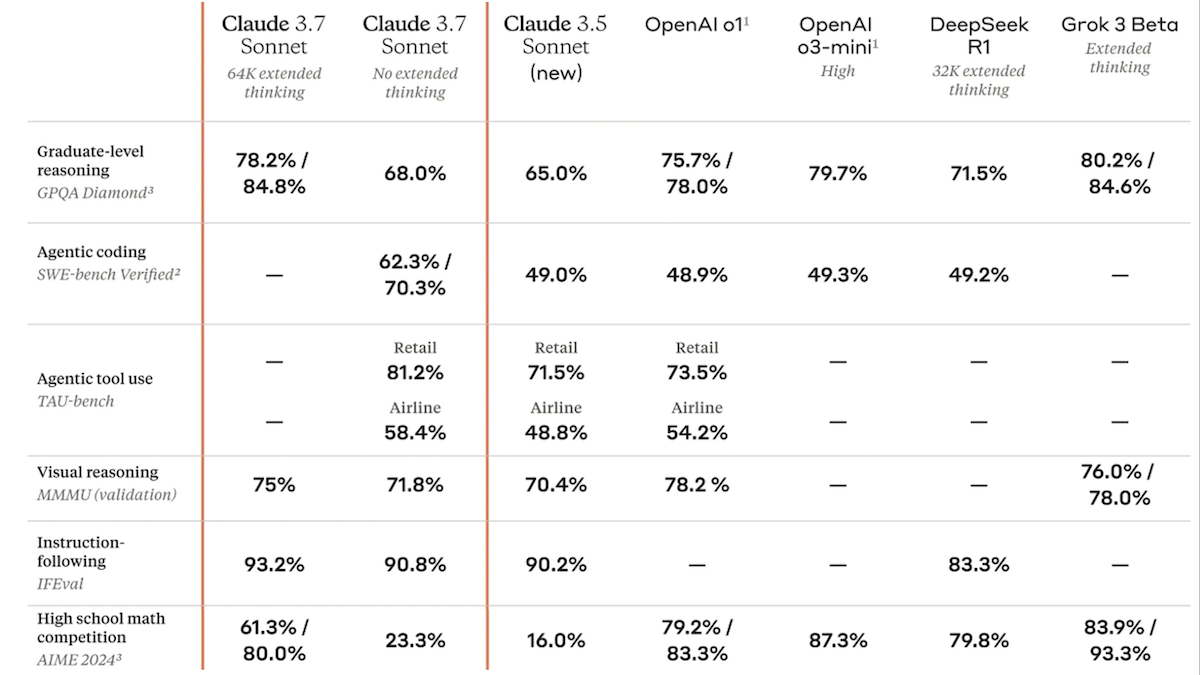

In [6]:
image_documents[answer.image_response[0].id].image